## To do list:

- Create a feature like: 'Longest word said', we can build it by going word by word choosing the longest one and then verifying with a method that there are no special characters
- Most used emoji
- Number of times you have said: ['joder', 'mama', 'pedo']
- average response time
- create a better function to identify the names of the users
- % of messages that are replied within a day
- % of messages replied within an hour / minute / 10 minutes etc
- exact days with 'more' messages
- a graph with the most used emojis by user
- numero de links enviados
- different metrics for "mean time in between messages" and "mean time to respond a request"no es lo mismo que nacho me pregunte algo y yo le responda a las dos horas, y calcular el tiempo medio de res- puesta, que calcular la media sin mas entre mensaje
- average message per day 
- count '<multimedia omitido' y <multimedia omitted (in english)
- weeks without messages (I think it would involve df.resample('w') and check for weeks without messages
- distribucion de los mensajes entre la madrugada, mañana, tarde y noche
- I should add a function that indentifies european vs american calendar dates
- Also another function that identifies 24h format vs am,pm
- The lag features are quite buggy, if you sort_values('response time') you will see it, looks like if you have a "multimedia "file" it just gets bugged because the dates get switched
- count multimedia function
- **use index.dt.floor('day' or 'd') to resample instead** (looks like I found an error but I was wrong)
- most used word by moment of the day (quarter 1-4)
- longest period without talking
- **I think that I should create a global variable of users within methods.py and just keep on using that variable all the time**
- PALABRA MAS USADA (miguel)


In [113]:
# https://github.com/huggingface/nlp
# ask Jacopo about the other site with the papers

In [114]:
import streamlit as st

In [115]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime # this actually means import datetime.datetime
import seaborn as sns
import emoji
import streamlit

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
from methods import create_chat_list, clean_chat_list

chat = create_chat_list()
chat = clean_chat_list(chat)


In [4]:
chat_test = create_chat_list()

In [5]:
import re

In [6]:
re.split(r'\d\d?/\d\d?/\d\d\s\d\d?:\d\d?\s-\s', chat_test[0])

['', 'Gleb Uni: Con buenas vibras y concentración easy']

In [7]:
# [re.findall(r'\d\d?/\d\d?/\d\d\s\d\d?:\d\d?', chat_test[i]) for i in range(10000)]

In [10]:
# chat

In [11]:
from methods import chat_to_df

df = chat_to_df(chat)

In [12]:
df

,id,user,message,year,month,week,day,dayweek,hour,minute,emoji_count,media,words_count
date,,,,,,,,,,,,,
2017-06-19 18:27:00,0,Gleb Uni,Con buenas vibras y concentración easy,2017,6,25,19,0,18,27,0,0,7
2017-06-19 18:27:00,1,Nacho,Sii,2017,6,25,19,0,18,27,0,0,2
2017-06-19 18:28:00,2,Nacho,"De esto, basicamente pienso que cuando tu sab...",2017,6,25,19,0,18,28,0,0,46
2017-06-19 18:28:00,3,Nacho,"Es decir, se trstaria de evaluar un producto ...",2017,6,25,19,0,18,28,0,0,19
2017-06-19 18:28:00,4,Nacho,Mas o menos,2017,6,25,19,0,18,28,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 23:36:00,39994,Gleb Uni,https://towardsdatascience.com/analyzethechat...,2020,6,27,30,1,23,36,0,0,2
2020-06-30 23:36:00,39995,Gleb Uni,sii,2020,6,27,30,1,23,36,0,0,2
2020-06-30 23:36:00,39996,Gleb Uni,justo,2020,6,27,30,1,23,36,0,0,2


In [13]:
df[(df.emoji_count != 0) & (df.user == 'Nacho')].emoji_count.sum()

147

In [14]:
df[(df.emoji_count != 0) & (df.user == 'Gleb Uni')].emoji_count.sum()

1156

Resampling examples // Does not make sense

In [15]:
df.resample('d')

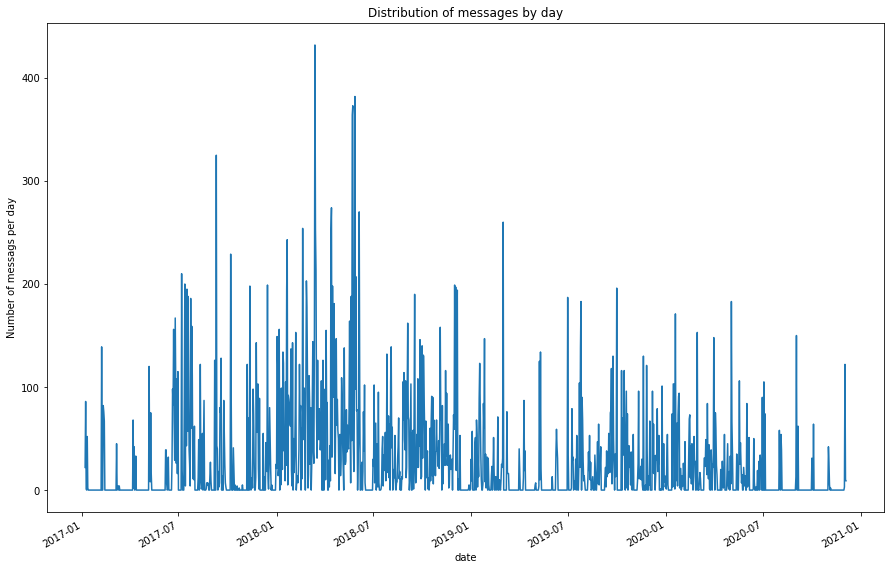

In [16]:
from charts import message_distribution_plot

message_distribution_plot(df,'day')

In [17]:
from charts import value_counts_plot, value_counts_plot_sns

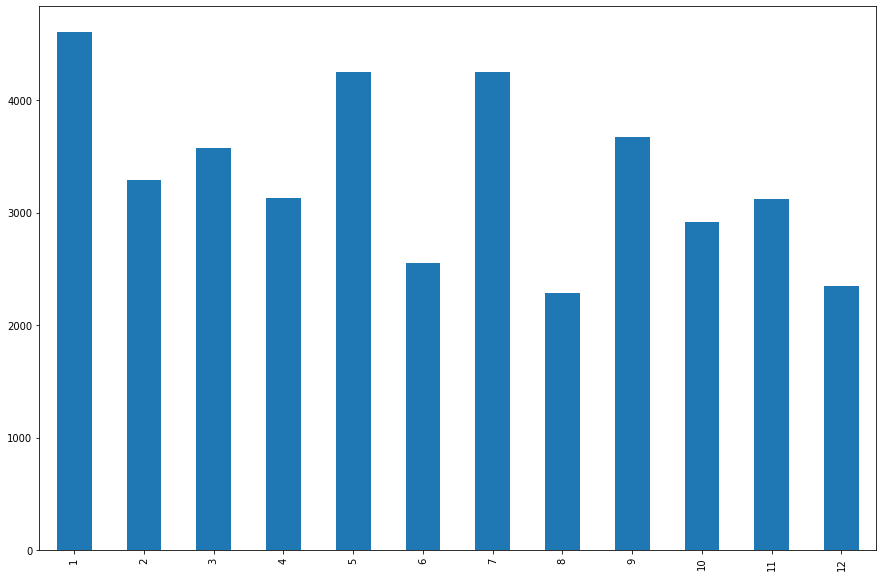

In [18]:
value_counts_plot(df.month)

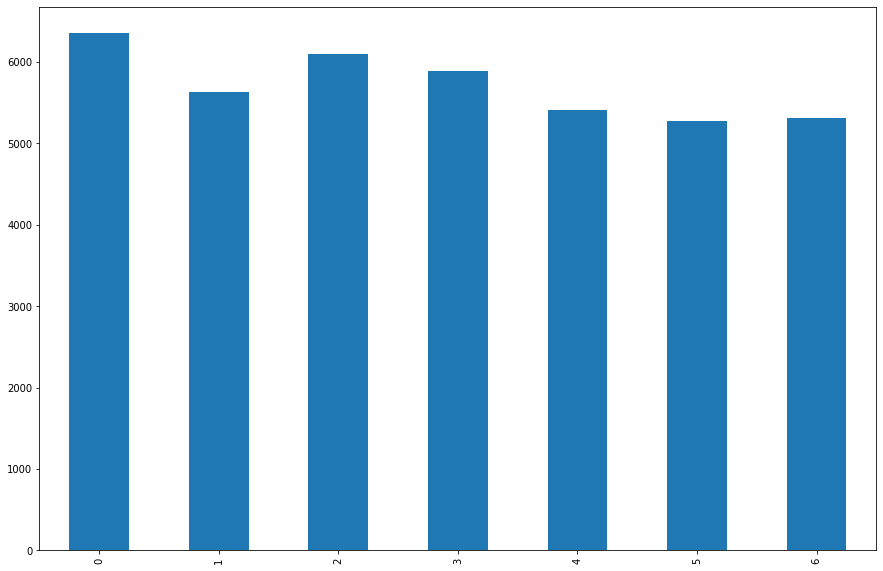

In [21]:
value_counts_plot(df.dayweek)

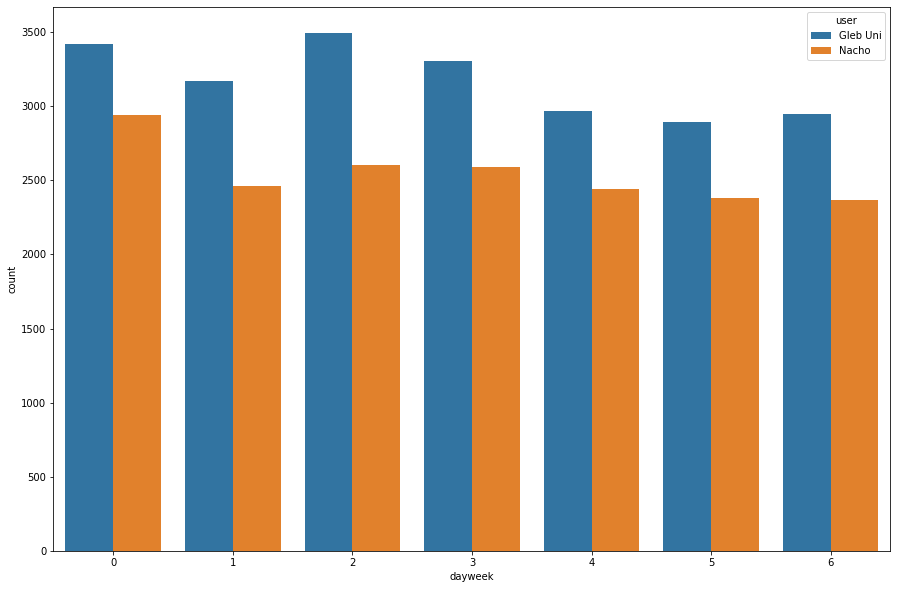

In [22]:
from charts import value_counts_plot_sns_hue

value_counts_plot_sns_hue(df, 'dayweek', 'user')

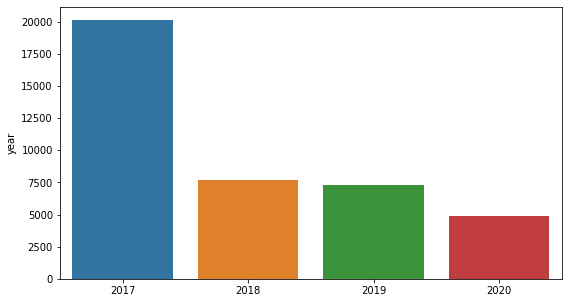

In [23]:
plt.figure(figsize=(9,5))
sns.barplot(
    x = list(set(df.year.values )),
    y = df.year.value_counts(),
    # hue=df.user.unique()
)

In [24]:
len(df.iloc[0].message)

39

### To do: make a column with the length of the message, make a column whether or not there is an emoji, make a column of answer time and then some charts on average answering time

In [25]:
df_lag = df.copy()

In [26]:
# Would be nice to create a lag function for all the users, the thing is that I am not completely sure how to do it
#for user in unique_users:
        

In [27]:
df_gleb = df_lag[df.user == 'Gleb Uni']
df_nacho = df_lag[df.user == 'Nacho']


In [28]:
df_gleb.loc[:,'date2'] = df_gleb.iloc[:,0].index
df_nacho.loc[:, 'date2'] = df_nacho.iloc[:,0].index

/home/neuralcrypto/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/neuralcrypto/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [29]:
df_gleb.date2.shift(1).values
df_nacho.date2.shift(1).values

array([                          'NaT', '2017-06-19T18:27:00.000000000',
       '2017-06-19T18:28:00.000000000', ...,
       '2020-06-30T23:24:00.000000000', '2020-06-30T23:35:00.000000000',
       '2020-06-30T23:36:00.000000000'], dtype='datetime64[ns]')

In [30]:
df_gleb.date2

date
2017-06-19 18:27:00   2017-06-19 18:27:00
2017-06-19 18:29:00   2017-06-19 18:29:00
2017-06-19 18:29:00   2017-06-19 18:29:00
2017-06-19 18:30:00   2017-06-19 18:30:00
2017-06-19 18:30:00   2017-06-19 18:30:00
                              ...        
2020-06-30 23:36:00   2020-06-30 23:36:00
2020-06-30 23:36:00   2020-06-30 23:36:00
2020-06-30 23:36:00   2020-06-30 23:36:00
2020-06-30 23:36:00   2020-06-30 23:36:00
2020-06-30 23:36:00   2020-06-30 23:36:00
Name: date2, Length: 22202, dtype: datetime64[ns]

In [31]:
pd.DataFrame(df_gleb.index).shift(1)

,date
0,NaT
1,2017-06-19 18:27:00
2,2017-06-19 18:29:00
3,2017-06-19 18:29:00
4,2017-06-19 18:30:00
...,...
22197,2020-06-30 23:36:00
22198,2020-06-30 23:36:00
22199,2020-06-30 23:36:00
22200,2020-06-30 23:36:00


In [32]:
type( pd.Series(df_gleb.index).shift(1))

pandas.core.series.Series

In [33]:
df_gleb['lag'] = df_gleb.date2.shift(1)
df_nacho['lag'] = df_nacho.date2.shift(1)

/home/neuralcrypto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/neuralcrypto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
df_gleb['lag'] = pd.Series(df_gleb.index).shift(1)
df_nacho['lag'] = pd.Series(df_nacho.index).shift(1)

/home/neuralcrypto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/neuralcrypto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
df_gleb.sort_values('response time')

KeyError: 'response time'

In [36]:
df_lag = pd.concat([df_gleb,df_nacho]).sort_values('id')

In [37]:
df_lag[35453:35480]

,id,user,message,year,month,week,day,dayweek,hour,minute,emoji_count,media,words_count,date2,lag
date,,,,,,,,,,,,,,,
2020-11-01 14:35:00,35453,Nacho,Creo que voy a salir bien parado,2020,11,44,1,6,14,35,0,0,8,2020-11-01 14:35:00,NaT
2020-11-01 15:01:00,35454,Gleb Uni,Hell yeah,2020,11,44,1,6,15,1,0,0,3,2020-11-01 15:01:00,NaT
2020-11-01 15:01:00,35455,Gleb Uni,Cómo llevas el examen guarro?,2020,11,44,1,6,15,1,0,0,6,2020-11-01 15:01:00,NaT
2020-11-01 16:02:00,35456,Nacho,Pues son varios modelos de creximiento,2020,11,44,1,6,16,2,0,0,7,2020-11-01 16:02:00,NaT
2020-11-01 16:02:00,35457,Nacho,Que sé como se comportan pero me falta alguna...,2020,11,44,1,6,16,2,0,0,11,2020-11-01 16:02:00,NaT
2020-11-01 16:02:00,35458,Nacho,Me falta practica y problemas,2020,11,44,1,6,16,2,0,0,6,2020-11-01 16:02:00,NaT
2020-11-01 16:02:00,35459,Nacho,Es el lunes a las 18,2020,11,44,1,6,16,2,0,0,7,2020-11-01 16:02:00,NaT
2020-11-01 16:02:00,35460,Nacho,Confío poder hacerlo,2020,11,44,1,6,16,2,0,0,4,2020-11-01 16:02:00,NaT
2020-12-01 13:06:00,35461,Nacho,<Multimedia omitido>,2020,12,49,1,1,13,6,0,1,3,2020-12-01 13:06:00,NaT


In [38]:
df_lag.sort_values(by='response time', )

KeyError: 'response time'

In [39]:
df.resample('d'.lower()).count().sort_values('user', ascending=False).loc[:,'user']

date
2018-03-14    432
2018-05-28    382
2018-05-24    373
2018-05-23    364
2017-09-10    325
             ... 
2019-07-12      0
2017-09-30      0
2017-09-29      0
2019-07-17      0
2018-12-22      0
Name: user, Length: 1428, dtype: int64

In [ ]:
df_nacho.iloc[2089:2098]

In [ ]:
df_nacho.iloc[2089:2098]

In [ ]:
df_gleb['response time'] = (df_gleb.date2 - df_gleb.lag)
df_nacho['response time'] = (df_nacho.date2 - df_nacho.lag)

In [ ]:
df_gleb.loc[:,['response time']]

In [ ]:
# mean response time of gleb
# I am thinking that the best possible way of getting an accurate response would be to count how many responses
# have been executed in the same minute, and from that point, calculate the time that it took to reply based
# on the lenght of the message, an 'ok' is 1 second, 'tio pero que quieres decir' is '3seconds', etc

# different metrics for "mean time in between messages" and "mean time to respond a request"
# no es lo mismo que nacho me pregunte algo y yo le responda a las dos horas, y calcular el tiempo medio de res-
# puesta, que calcular la media sin mas entre mensaje
df_gleb.iloc[:,12].mean().total_seconds()

### Create the column, replied within 5 minutes and within 1 day

In [137]:
from methods import *

statistics_users(df)

user,Gleb Uni,Nacho
Total Messages,22202,17797
% Total Messages,55.51,44.49
Total Words,116229,124008
% Total words,48.38,51.62
Longest word,Jajahajajajajajajajajjajajqjajajajajajq,Wowowowowowowowowowowowowow
Most words,1582 (2018-03-14),1376 (2018-03-14)
Most messages,283 (2018-03-14),151 (2018-05-23)
Total emojis used,1156,147


## Tengo que solucionar el tema de que se buguea y se lia con usuario y con el indice,
## creo que siempre deberiamos ordenar los users para que eso no pase

In [42]:
xmess, words = most_words(df)

In [40]:
mess.update(words)

In [ ]:
df.index

In [ ]:
df.groupby(df.index.floor('d')).size().index

In [ ]:
pd.DataFrame(df.words_count.resample('d').sum())

In [ ]:
#this is a not very cool way of getting the maximum words count per day
# but works
df.groupby(['dmy', 'user']).sum().sort_values('words_count')

In [ ]:
df.groupby(['dmy', 'user']).count().sort_values('message')

In [ ]:
df.groupby('dmy').sum().sort_values('words_count').iloc[-1].name

In [ ]:
pd.to_datetime('14/3/2018').day

In [ ]:
df.resample('d').sum().sort_index()

In [ ]:
df[0:1]

In [ ]:
df['dmy'] = df.day.astype(str) + '/' + df.month.astype(str) + '/' + df.year.astype(str)

In [ ]:
df

## Graphs

In [138]:
from charts import *

In [141]:
df

,id,user,message,year,month,week,day,dayweek,hour,minute,emoji_count,media,words_count
date,,,,,,,,,,,,,
2017-06-19 18:27:00,0,Gleb Uni,Con buenas vibras y concentración easy,2017,6,25,19,0,18,27,0,0,7
2017-06-19 18:27:00,1,Nacho,Sii,2017,6,25,19,0,18,27,0,0,2
2017-06-19 18:28:00,2,Nacho,"De esto, basicamente pienso que cuando tu sab...",2017,6,25,19,0,18,28,0,0,46
2017-06-19 18:28:00,3,Nacho,"Es decir, se trstaria de evaluar un producto ...",2017,6,25,19,0,18,28,0,0,19
2017-06-19 18:28:00,4,Nacho,Mas o menos,2017,6,25,19,0,18,28,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 23:36:00,39994,Gleb Uni,https://towardsdatascience.com/analyzethechat...,2020,6,27,30,1,23,36,0,0,2
2020-06-30 23:36:00,39995,Gleb Uni,sii,2020,6,27,30,1,23,36,0,0,2
2020-06-30 23:36:00,39996,Gleb Uni,justo,2020,6,27,30,1,23,36,0,0,2


In [146]:
# message_distribution_plot(df)

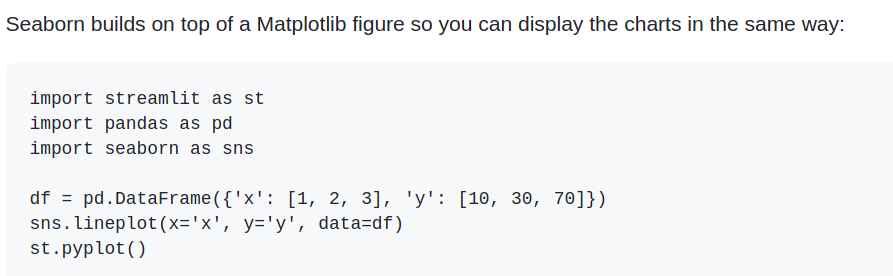

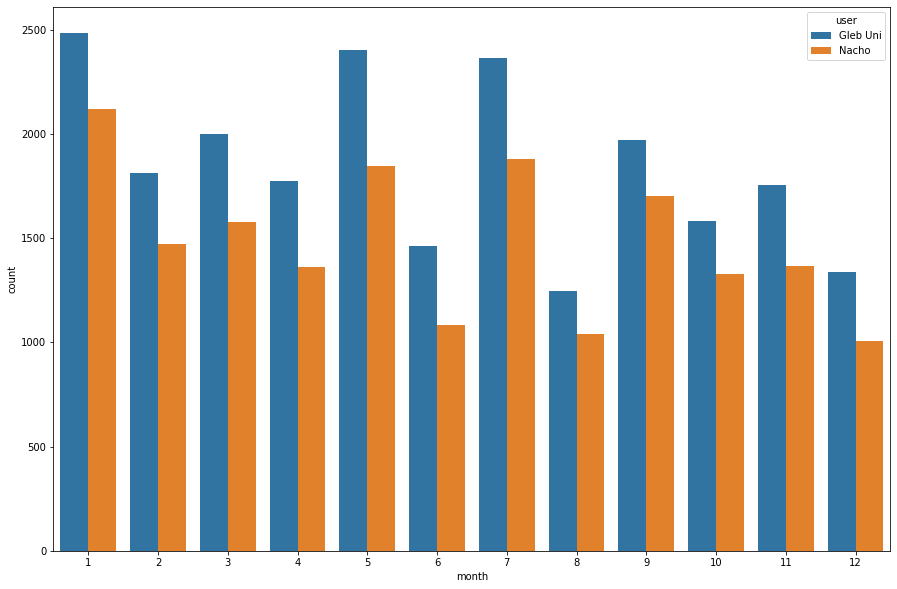

In [147]:
value_counts_plot_sns_hue(df, 'month', 'user')

In [143]:
st.pyplot()

<Figure size 432x288 with 0 Axes>